[70 pts] Task 1: Implementation

•	[60 pts] Implement LDA, Perceptron, and Logistic regression using NumPy only. 

•	[5 pts] Fit the dataset and report the accuracy. Use sklearn.metrics.accuracy_score for the model accuracy calculation. All three models should have an accuracy higher than 80% when the dataset is not trained. 

•	[5 pts] Make visualization of models and verify if models are acceptable. 


imports for entire project

In [1732]:
# Load Packages
import numpy as np
np.random.seed(12)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score 


In [1733]:
# loading the data 
df = pd.read_csv("project1_1.csv",header=0)

# preprocessing data

In [1734]:
#pre processing the data
df.shape

(100, 4)

In [1735]:
df.head()

,Unnamed: 0,X,Y,Class
0,0,0.871319,0.490718,0.0
1,1,0.715472,-0.458668,1.0
2,2,1.462538,-0.386599,1.0
3,3,-0.222521,0.974928,0.0
4,4,0.327699,-0.240278,1.0


In [1736]:
df.isnull().sum()

Unnamed: 0    0
X             0
Y             0
Class         0
dtype: int64

In [1737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   X           100 non-null    float64
 2   Y           100 non-null    float64
 3   Class       100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [1738]:
# drop the first column as its just indices
df.drop(columns=['Unnamed: 0'],inplace=True)

# converted the class column to int as its 1 and 0
df['Class'] = (df['Class'].astype(int))


In [1739]:
print(df.duplicated().sum() )

0


# data split and standardization

In [1740]:
# standardization using mean and standard deviation 

X = df.drop(columns = ['Class'],axis =1)
y = df['Class']


In [1741]:

import numpy as np

def train_test_split(*arrays, test_size=None, train_size=None, random_state=None):
    """Split arrays or matrices into random train and test subsets.
    """
    # Determine the number of input arrays
    n = len(arrays)
    
    # Check that all arrays have the same length
    lengths = [len(arr) for arr in arrays]
    if len(set(lengths)) > 1:
        raise ValueError("All input arrays must have the same length.")
        
    # Determine the number of samples and the size of the training set
    n_samples = lengths[0]
    if test_size is not None:
        train_size = n_samples - int(n_samples * test_size)
    elif train_size is None:
        train_size = int(n_samples * 0.8)
        
    # Generate a random permutation of the sample indices
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(n_samples)
    
    # Split the arrays into training and testing sets
    arrays_train = [arr[indices[:train_size]] for arr in arrays]
    arrays_test = [arr[indices[train_size:]] for arr in arrays]
    
    # Return the training and testing sets as separate arrays
    return arrays_train[0], arrays_test[0], arrays_train[1], arrays_test[1]

In [1742]:
X=X.to_numpy()
y=y.to_numpy().reshape(-1,1)


X_train, X_test, y_train, y_test =  train_test_split(X,y,random_state=12,train_size=0.8,test_size=0.2)
d = X_train.shape[1]
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

def scaleData(data,mean,std):
    data_scaled = (data - mean) / std
    return data_scaled

X_train_scaled = scaleData(X_train ,X_mean , X_std)
y_train_scaled = scaleData(y_train , y_mean, y_std)
X_test_scaled = scaleData(X_test ,X_mean , X_std)
y_test_scaled = scaleData(y_test, y_mean, y_std)

[[-7.61445958e-01  6.48228395e-01]
 [ 1.80141362e+00 -9.81105305e-02]
 [ 9.03976974e-01 -4.95379113e-01]
 [ 3.20515776e-02  9.99486216e-01]
 [ 3.76510198e-01 -2.81831482e-01]
 [ 1.83808810e+00 -4.55349012e-02]
 [-3.20515776e-02  9.99486216e-01]
 [-9.00968868e-01  4.33883739e-01]
 [ 1.76144596e+00 -1.48228395e-01]
 [ 5.72116660e-01  8.20172255e-01]
 [ 1.09602303e+00 -4.95379113e-01]
 [ 1.40478334e+00 -4.14412623e-01]
 [ 7.18349350e-01  6.95682551e-01]
 [ 9.67294863e-01  2.53654584e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [-8.38088105e-01  5.45534901e-01]
 [ 8.40400105e-01 -4.87181783e-01]
 [-4.04783343e-01  9.14412623e-01]
 [-6.72300890e-01  7.40277997e-01]
 [ 1.15959990e+00 -4.87181783e-01]
 [-1.00000000e+00  1.22464680e-16]
 [ 1.99794539e+00  4.35929780e-01]
 [ 1.62348980e+00 -2.81831482e-01]
 [ 9.26916757e-01  3.75267005e-01]
 [ 1.03205158e+00 -4.99486216e-01]
 [-9.49055747e-01  3.15108218e-01]
 [ 7.61445958e-01  6.48228395e-01]
 [-2.84527587e-01  9.58667853e-01]
 [ 1.96729486e+00  2

In [1743]:
# # Select ratio
# ratio = 0.70
 
# total_rows = df.shape[0]
# train_size = int(total_rows*ratio)
 
# # Split the data into training and testing sets
# X_train = X[0:train_size]
# y_train = y[0:train_size]
# X_test = X[train_size:]
# y_test = y[train_size:]

# X_mean = np.mean(X_train, axis=0)
# X_std = np.std(X_train, axis=0)
# y_mean = np.mean(y_train)
# y_std = np.std(y_train)

# def scaleData(data,mean,std):
#     data_scaled = (data - mean) / std
#     return data_scaled

# d = X_train.shape[1]

# X_train_scaled = scaleData(X_train ,X_mean , X_std)
# y_train_scaled = scaleData(y_train , y_mean, y_std)
# X_test_scaled = scaleData(X_test ,X_mean , X_std)
# y_test_scaled = scaleData(y_test, y_mean, y_std)

# Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

( i had done this code for cs 583 assignment so reusing it )


we will use mini batch gradient descent for the logistic regression model

## Mini-Batch Gradient Descent (MBGD)
Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [1744]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    yx = np.multiply(yi,xi)
    yxw = np.dot(yx,w)
    expTerm1 = np.exp(-yxw)
    logTerm = np.log(1+expTerm1)
    obj = np.mean(logTerm) + (lam/2)*np.sum(w*w)
    expTerm2 = np.exp(yxw)
    g = np.mean( np.divide(-yx,1+expTerm2),axis = 0).reshape(d,1)+lam*w
    return obj,g


1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [1745]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    batchsize = 10 
    objvals = np.zeros(max_epoch)
    n = x.shape[0]
    # epoch loop 
    for i in range(max_epoch):
        # shuffling 
        randomIndices = np.random.permutation(n)
        x_random, y_random = x[randomIndices, :], y[randomIndices, :]
        currentObjValue = 0
        for j in range(0,n,batchsize):
            xi,yi = x_random[j:j+batchsize,:],y_random[j:j+batchsize,:]
            currObj_at_j, gt_at_j = mb_objective_gradient(w,xi,yi,lam)
            w -= learning_rate*gt_at_j
            currentObjValue+= currObj_at_j
        
        learning_rate *= 0.95
        objvals[i]= currentObjValue/(n/batchsize)
        # print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')
    return w, objvals
    

# LDA 

# Perceptron

# training

In [1746]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_mbgd, objvals_mbgd = mbgd(X_train_scaled, y_train_scaled, lam, learning_rate, w)


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [1747]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    f = np.sign(np.dot(X,w))
    return np.asarray(f)

In [1748]:

# Mini-Batch Gradient Descent 
f_train_mbgd = predict(w_mbgd, X_train_scaled)
diff = np.abs(f_train_mbgd - y_train_scaled) / 2
error_train_mbgd = np.mean(diff)
print('Training classification error for Mini-Batch Gradient Descent is ' + str(error_train_mbgd))
print('accuracy score is : ',accuracy_score(f_train_mbgd,y_train_scaled))

Training classification error for Mini-Batch Gradient Descent is 0.1
accuracy score is :  0.9


# Graphs

In [1749]:
#descaling data for graph plots
y_pred_unscaled = y_train_scaled*y_std + y_mean
y_pred_unscaled=y_pred_unscaled.astype(int)
f_train_mbgd = f_train_mbgd*y_std + y_mean
f_train_mbgd=f_train_mbgd.astype(int)

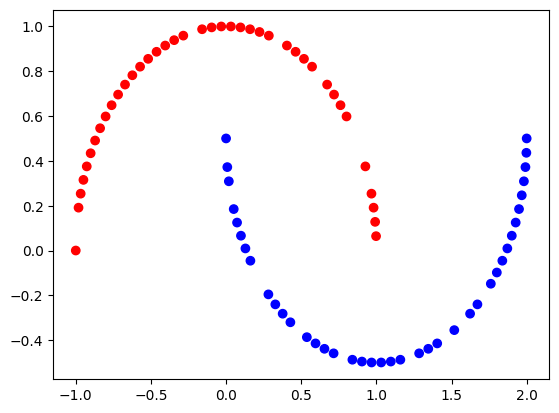

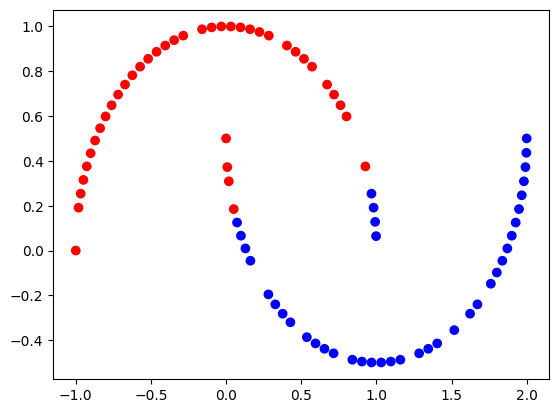

In [1750]:
colors = np.array(['red', 'blue'])
plt.scatter(X_train[:, 0], X_train[:, 1], color=colors[y_pred_unscaled.ravel()])
plt.show()

plt.scatter(X_train[:, 0], X_train[:, 1], color=colors[f_train_mbgd.ravel()])
plt.show()
